# Pre-processing
Initial EDA. 
Takes in the initial text data and returns various pre-processed data sets to the data folder.

## STEP 1: File Input

In [2]:
%pylab inline
import pandas as pd
import os

# data visualization
import matplotlib.pyplot as plt

# NLP
import nltk


Populating the interactive namespace from numpy and matplotlib


Change the current working directory to the data folder.

In [2]:
os.getcwd()
os.chdir("../data")


Read file into a pandas data frame.

In [4]:
txt_file = 'yelp_labelled.txt';
df = pd.read_table(txt_file, sep='\t')
df.columns = ['Reviews','Sentiment']
df.head()

,Reviews,Sentiment
0,Crust is not good.,0
1,Not tasty and the texture was just nasty.,0
2,Stopped by during the late May bank holiday of...,1
3,The selection on the menu was great and so wer...,1
4,Now I am getting angry and I want my damn pho.,0


## STEP 2: EDA

Basic Statistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
Reviews      999 non-null object
Sentiment    999 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [6]:
df.describe(include="all")

,Reviews,Sentiment
count,999,999.000000
unique,995,NaN
top,The food was terrible.,NaN
freq,2,NaN
mean,NaN,0.499499
std,NaN,0.500250
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


In [7]:
df.Reviews.describe()

count                        999
unique                       995
top       The food was terrible.
freq                           2
Name: Reviews, dtype: object

In [8]:
df.Sentiment.describe()

count    999.000000
mean       0.499499
std        0.500250
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sentiment, dtype: float64

Graphs.

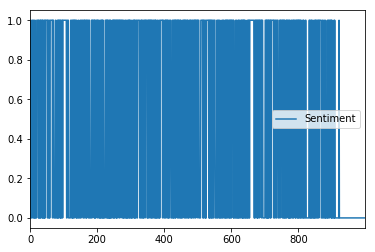

In [9]:
df.plot()

STEP 3: Clean data

In [10]:
#Remove problems with encoding
df['Reviews'] = df['Reviews'].apply(lambda x: unicode(x, errors="ignore"))

In [10]:
#tokenize without the punctuation
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
#tokenizer.tokenize('Eighty-seven miles to go, yet.  Onward!')
df['tokens'] = df['Reviews'].apply(lambda x: tokenizer.tokenize(x))

#re arrange the columns
df = df[['tokens', 'Sentiment']]

In [11]:
df.to_csv('tokens.csv')

In [22]:
from nltk.corpus import stopwords
stopwords
stop = set(stopwords.words('english'))
df['No Stops'] = df['tokens'].apply(lambda x: [item for item in x if item not in stop])

In [23]:
df.head()

,tokens,Sentiment,No Stops
0,"[Crust, is, not, good]",0,"[Crust, good]"
1,"[Not, tasty, and, the, texture, was, just, nasty]",0,"[Not, tasty, texture, nasty]"
2,"[Stopped, by, during, the, late, May, bank, ho...",1,"[Stopped, late, May, bank, holiday, Rick, Stev..."
3,"[The, selection, on, the, menu, was, great, an...",1,"[The, selection, menu, great, prices]"
4,"[Now, I, am, getting, angry, and, I, want, my,...",0,"[Now, I, getting, angry, I, want, damn, pho]"


In [14]:
df.to_csv('no_stop.csv')

Stemming.

In [15]:
type(df['No Stops'].values[0][0])

unicode

Handles a decoding error when calling the stemmer.

In [16]:
df['Unicode'] = df['No Stops'].apply(lambda x: [y.decode('UTF-8') for y in x])

In [17]:
ps = nltk.PorterStemmer()

df['Stemmed']= df['Unicode'].apply(lambda x: [ps.stem(y) for y in x])

In [18]:
df['Stemmed'].head()

0                                        [crust, good]
1                          [not, tasti, textur, nasti]
2    [stop, late, may, bank, holiday, rick, steve, ...
3                    [the, select, menu, great, price]
4             [now, I, get, angri, I, want, damn, pho]
Name: Stemmed, dtype: object

In [19]:
df.to_csv('stemmed.csv')

POS Tagging

In [20]:
df['POS']= df['Stemmed'].apply(lambda x: nltk.pos_tag(x))

Clean up file

In [21]:
temp = df[['POS', 'Sentiment']]

In [22]:
temp.to_csv('final.csv')

In [23]:
#temp["Review"] = temp['POS'].apply(lambda x: " ".join(x).encode('UTF-8'))

In [24]:
temp.head()

,POS,Sentiment
0,"[(crust, NN), (good, NN)]",0
1,"[(not, RB), (tasti, JJ), (textur, NN), (nasti,...",0
2,"[(stop, VB), (late, NN), (may, MD), (bank, NN)...",1
3,"[(the, DT), (select, JJ), (menu, NN), (great, ...",1
4,"[(now, RB), (I, PRP), (get, VBP), (angri, JJ),...",0


In [25]:
type(temp['POS'].values[0])

list

Reading The data again, test.

In [26]:
csv_file = 'final.csv';
rdf = pd.read_csv(csv_file)
rdf.head()

,Unnamed: 0,POS,Sentiment
0,0,"[(u'crust', 'NN'), (u'good', 'NN')]",0
1,1,"[(u'not', 'RB'), (u'tasti', 'JJ'), (u'textur',...",0
2,2,"[(u'stop', 'VB'), (u'late', 'NN'), (u'may', 'M...",1
3,3,"[(u'the', 'DT'), (u'select', 'JJ'), (u'menu', ...",1
4,4,"[(u'now', 'RB'), (u'I', 'PRP'), (u'get', 'VBP'...",0


In [146]:
type(rdf['POS'].values[0])

str

In [28]:
rdf['words'] = rdf['POS'].apply(lambda x: x.split(","))

In [29]:
rdf.head()

,Unnamed: 0,POS,Sentiment,words
0,0,"[(u'crust', 'NN'), (u'good', 'NN')]",0,"[[(u'crust', 'NN'), (u'good', 'NN')]]"
1,1,"[(u'not', 'RB'), (u'tasti', 'JJ'), (u'textur',...",0,"[[(u'not', 'RB'), (u'tasti', 'JJ'), (u'tex..."
2,2,"[(u'stop', 'VB'), (u'late', 'NN'), (u'may', 'M...",1,"[[(u'stop', 'VB'), (u'late', 'NN'), (u'may..."
3,3,"[(u'the', 'DT'), (u'select', 'JJ'), (u'menu', ...",1,"[[(u'the', 'DT'), (u'select', 'JJ'), (u'me..."
4,4,"[(u'now', 'RB'), (u'I', 'PRP'), (u'get', 'VBP'...",0,"[[(u'now', 'RB'), (u'I', 'PRP'), (u'get', ..."


In [31]:
type(rdf['words'].values[0])


list

In [36]:
type(rdf['words'].values[0][0])

str

In [37]:
rdf['words'].values[0][1]

" 'NN')"

Pickling Test

In [38]:
temp.to_pickle('test.pickle')

In [39]:
pdf = pd.read_pickle('test.pickle')

In [40]:
pdf.head()

,POS,Sentiment
0,"[(crust, NN), (good, NN)]",0
1,"[(not, RB), (tasti, JJ), (textur, NN), (nasti,...",0
2,"[(stop, VB), (late, NN), (may, MD), (bank, NN)...",1
3,"[(the, DT), (select, JJ), (menu, NN), (great, ...",1
4,"[(now, RB), (I, PRP), (get, VBP), (angri, JJ),...",0


In [41]:
type(pdf['POS'])

pandas.core.series.Series

In [49]:
type(pdf['POS'].values[0][0][0])

unicode